In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

reduce_mean(input_tensor,
                axis=None,
                keep_dims=False,
                name=None,
                reduction_indices=None)
第一个参数input_tensor： 输入的待降维的tensor;
第二个参数axis： 指定的轴，如果不指定，则计算所有元素的均值;
第三个参数keep_dims：是否降维度，设置为True，输出的结果保持输入tensor的形状，设置为False，输出结果会降低维度;
第四个参数name： 操作的名称;
第五个参数 reduction_indices：在以前版本中用来指定轴，已弃用;


In [2]:
#生成随机样本点
x_data=np.linspace(-0.5,0.5,200)[:,np.newaxis] #shape由一维变为二维
noise=np.random.normal(0,0.2,x_data.shape)
y_data=np.square(x_data)+noise
x=tf.placeholder(np.float32,[None,1]) #生成一列placeholder
y=tf.placeholder(np.float32,[None,1])

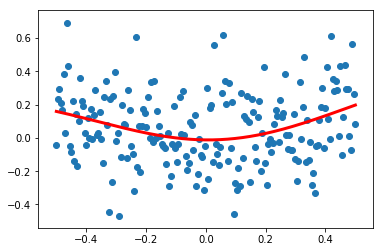

In [4]:
#定义中间层
Weight_L1=tf.Variable(tf.random_normal([1,10]))
bias_L1=tf.Variable(tf.zeros([1,10]))
Wx_L1=tf.matmul(x,Weight_L1)+bias_L1
L1=tf.nn.tanh(Wx_L1)
#定义输出层
Weight_L2=tf.Variable(tf.random_normal([10,1]))
bias_L2=tf.Variable(tf.zeros([1,1]))
Wx_L2=tf.matmul(L1,Weight_L2)+bias_L2
prediction=tf.nn.tanh(Wx_L2)
#二次代价函数
loss=tf.reduce_mean(tf.square(y-prediction))
#梯度下降法训练
train_step=tf.train.GradientDescentOptimizer(0.1).minimize(loss)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for _ in range(2000):
        sess.run(train_step,feed_dict={x:x_data,y:y_data})
    prediction_value=sess.run(prediction,feed_dict={x:x_data})
    #画图
    plt.figure()
    plt.scatter(x_data,y_data)
    plt.plot(x_data,prediction_value,'r-',lw=3)
    plt.show()